<a href="https://colab.research.google.com/github/yusuufmm/Zindi-Notebooks/blob/main/expresso_churn_dsn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Introduction
This notebook is designed to help you get started with the Expresso Churn Prediction competition on Zindi. We will go through the steps of loading the data, performing basic Exploratory Data Analysis (EDA), preprocessing the data, and building a simple model to predict customer churn.

## Dataset Description

The churn dataset includes 19 variables, consisting of 15 numeric variables and 4 categorical variables. Below are the definitions and descriptions of each variable:

1. **user_id**: Unique identifier for each client.
2. **REGION**: The location of each client.
3. **TENURE**: Duration the client has been in the network.
4. **MONTANT**: Top-up amount.
5. **FREQUENCE_RECH**: Number of times the customer refilled.
6. **REVENUE**: Monthly income of each client.
7. **ARPU_SEGMENT**: Income over 90 days divided by 3 (Average Revenue Per User segment).
8. **FREQUENCE**: Number of times the client has made an income.
9. **DATA_VOLUME**: Number of connections or data usage.
10. **ON_NET**: Number of inter-Expresso calls.
11. **ORANGE**: Number of calls to the Orange network.
12. **TIGO**: Number of calls to the Tigo network.
13. **ZONE1**: Number of calls to Zone1.
14. **ZONE2**: Number of calls to Zone2.
15. **MRG**: Indicates if a client is going to churn.
16. **REGULARITY**: Number of times the client is active over 90 days.
17. **TOP_PACK**: The most frequently used packs by the client.
18. **FREQ_TOP_PACK**: Number of times the client has activated the top pack packages.
19. **CHURN**: Target variable indicating whether the client will churn.

Understanding these variables is crucial for building an effective model to predict customer churn.

## Importing Libraries
We start by importing the necessary libraries for data manipulation, visualization, and model building.


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

C:\Users\osink\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.26.4

  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


## Loading the Data
We load the train, test, and sample submission datasets.


In [ ]:
train = pd.read_csv("Train.csv")
test = pd.read_csv("Test.csv")
sample_sub = pd.read_csv("sample_submission.csv")

Let's take a look at the first few rows of each dataset to understand their structure.


In [ ]:
train.head()

,user_id,REGION,TENURE,MONTANT,FREQUENCE_RECH,REVENUE,ARPU_SEGMENT,FREQUENCE,DATA_VOLUME,ON_NET,ORANGE,TIGO,ZONE1,ZONE2,MRG,REGULARITY,TOP_PACK,FREQ_TOP_PACK,CHURN
0,dcf68cc2fb515ccad7d8b9b3bd80ee2a4b270063,SAINT-LOUIS,K > 24 month,17000.0,32.0,18000.0,6000.0,34.0,NaN,97.0,355.0,6.0,NaN,NaN,NO,62,All-net 500F=2000F;5d,35.0,0
1,71c44b5ba328db5c4192a80f7cf8f244d9350ed0,NaN,K > 24 month,4300.0,29.0,4427.0,1476.0,37.0,1764.0,8.0,3.0,0.0,NaN,2.0,NO,40,"Data: 100 F=40MB,24H",22.0,0
2,ce46411b1526c94f20a383b8cb188f8d27f82a0a,TAMBACOUNDA,K > 24 month,1500.0,3.0,1500.0,500.0,3.0,NaN,30.0,30.0,NaN,NaN,NaN,NO,32,All-net 500F=2000F;5d,3.0,0
3,f467cdb6669818373c26c2bad44e01ba66f97d21,FATICK,K > 24 month,1500.0,3.0,2497.0,832.0,4.0,0.0,159.0,45.0,19.0,NaN,NaN,NO,18,On net 200F=Unlimited _call24H,3.0,0
4,ec45e1a1888a32b5dcce0954cfec20c6e037db31,FATICK,K > 24 month,NaN,NaN,498.0,166.0,3.0,1.0,1.0,3.0,NaN,NaN,NaN,NO,50,NaN,NaN,0


In [ ]:
test.head()

,user_id,REGION,TENURE,MONTANT,FREQUENCE_RECH,REVENUE,ARPU_SEGMENT,FREQUENCE,DATA_VOLUME,ON_NET,ORANGE,TIGO,ZONE1,ZONE2,MRG,REGULARITY,TOP_PACK,FREQ_TOP_PACK
0,af900d87e73b7ff6509d2203df4704a98aa5f2a6,NaN,K > 24 month,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NO,1,NaN,NaN
1,5335efd940280b82143272275637d1e65d37eadb,NaN,K > 24 month,NaN,NaN,10.0,3.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NO,2,NaN,NaN
2,a581f4fa08677c26f83f643248c667e241043086,NaN,K > 24 month,1900.0,15.0,2299.0,766.0,21.0,414.0,NaN,7.0,2.0,NaN,NaN,NO,27,"Data: 100 F=40MB,24H",17.0
3,64f67177d0775262b8087a9e2e3b8061b6324ae6,DAKAR,K > 24 month,3000.0,9.0,2603.0,868.0,14.0,332.0,0.0,23.0,4.0,NaN,NaN,NO,46,IVR Echat_Daily_50F,3.0
4,0d6009a4594c4be22449b8d9cc01a0bcea98faea,DAKAR,K > 24 month,32000.0,47.0,33000.0,11000.0,47.0,NaN,128.0,555.0,280.0,NaN,NaN,NO,61,All-net 500F=2000F;5d,65.0


In [ ]:
sample_sub.head()

,user_id,CHURN
0,af900d87e73b7ff6509d2203df4704a98aa5f2a6,0
1,5335efd940280b82143272275637d1e65d37eadb,0
2,a581f4fa08677c26f83f643248c667e241043086,0
3,64f67177d0775262b8087a9e2e3b8061b6324ae6,0
4,0d6009a4594c4be22449b8d9cc01a0bcea98faea,0


## Exploratory Data Analysis (EDA)
Let's explore the training data to understand the relationships and distributions of features.


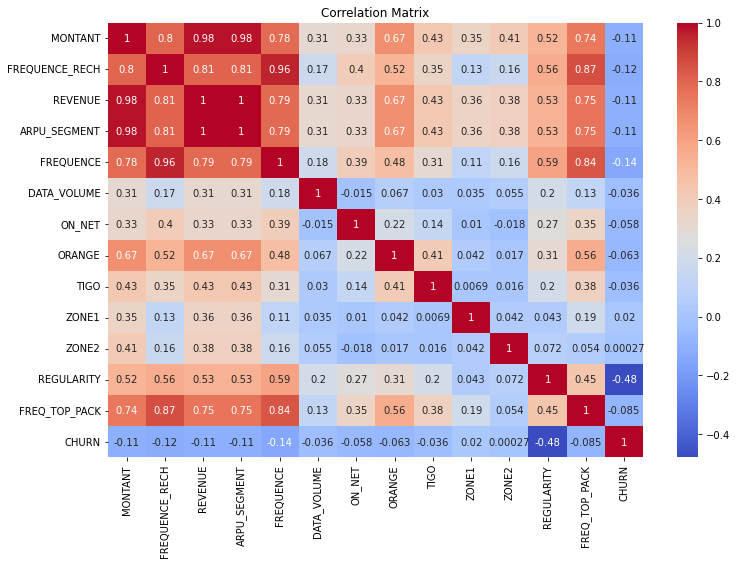

In [ ]:
correlation = train.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

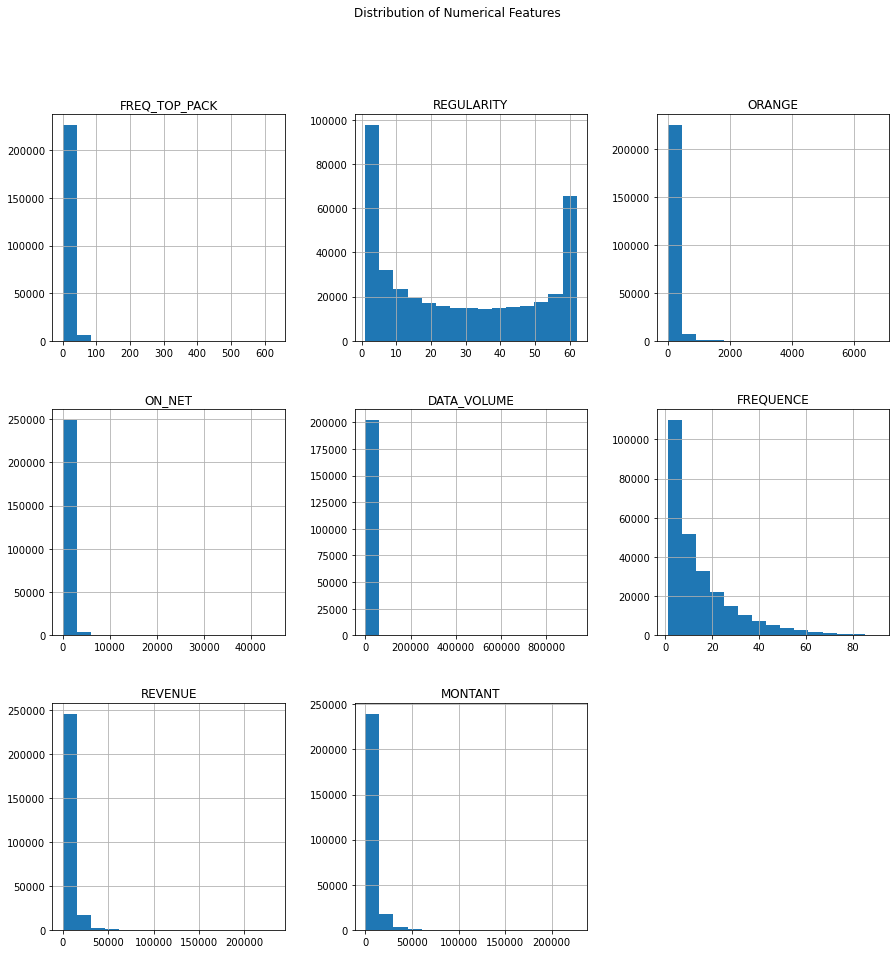

In [ ]:
# Plot histograms for numerical features
numerical_features = ["FREQ_TOP_PACK", "REGULARITY", "ORANGE", "ON_NET", "DATA_VOLUME", "FREQUENCE", "REVENUE", "MONTANT"]
train[numerical_features].hist(figsize=(15, 15), bins=15)
plt.suptitle('Distribution of Numerical Features')
plt.show()


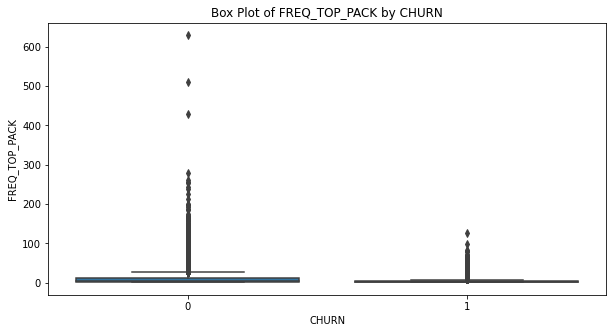

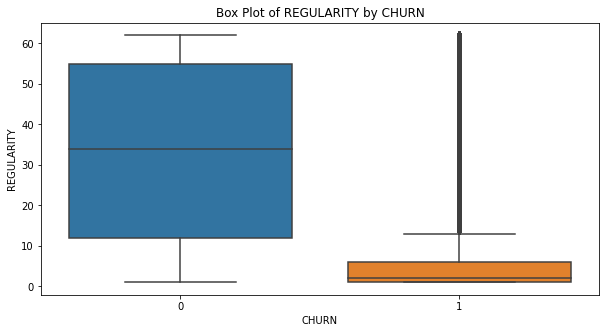

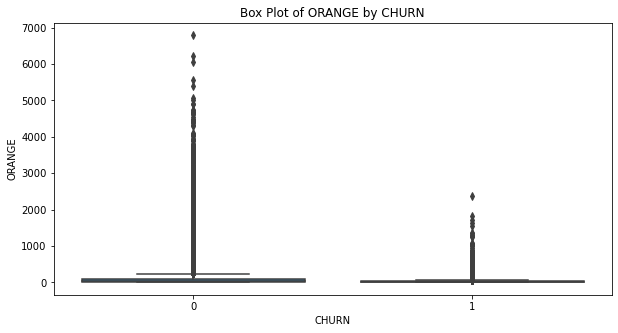

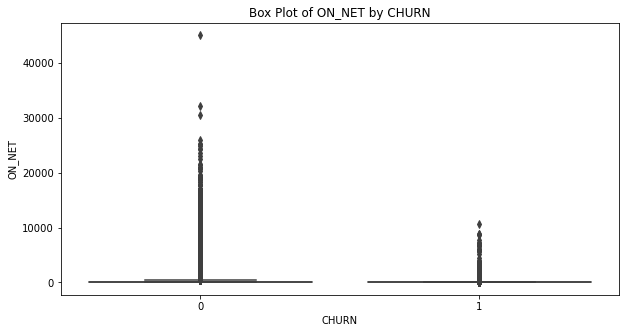

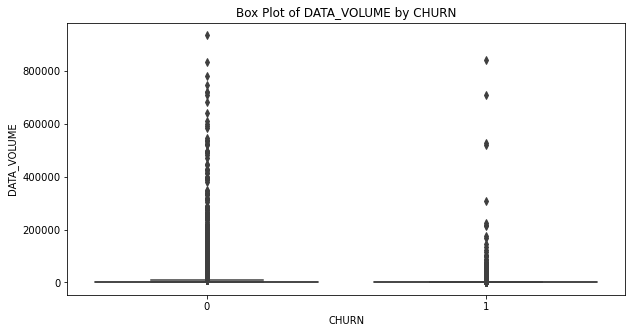

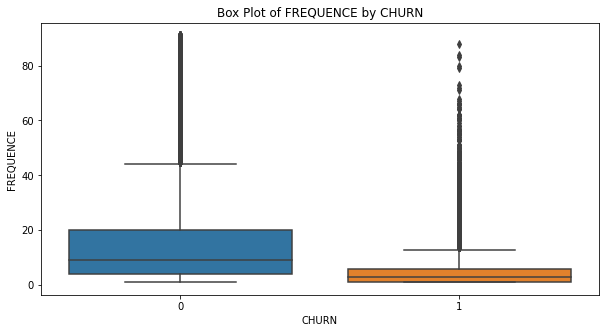

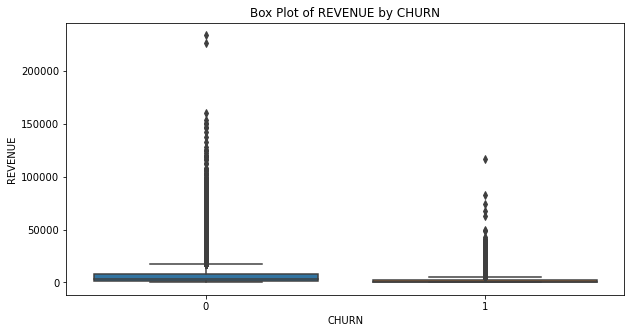

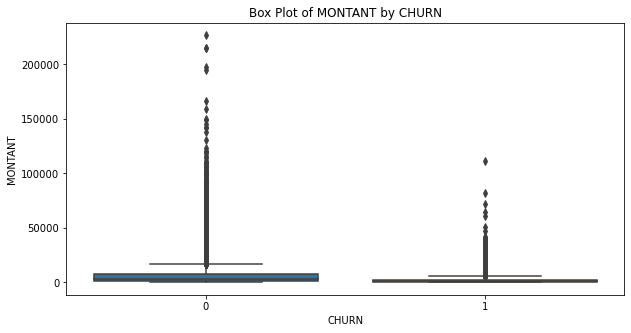

In [ ]:
# Plot box plots for numerical features
for col in numerical_features:
    plt.figure(figsize=(10, 5))
    sns.boxplot(x='CHURN', y=col, data=train)
    plt.title(f'Box Plot of {col} by CHURN')
    plt.show()


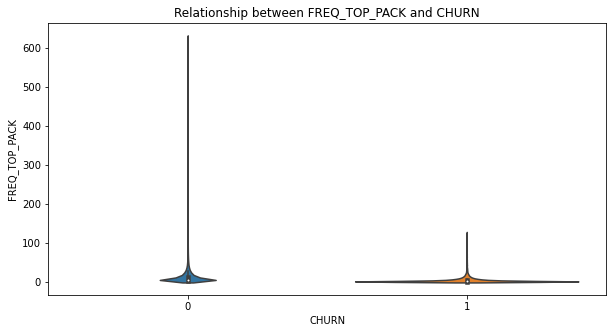

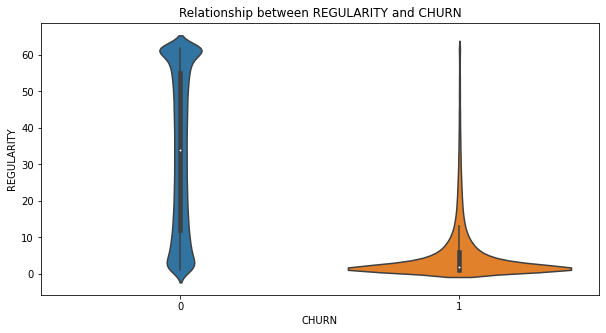

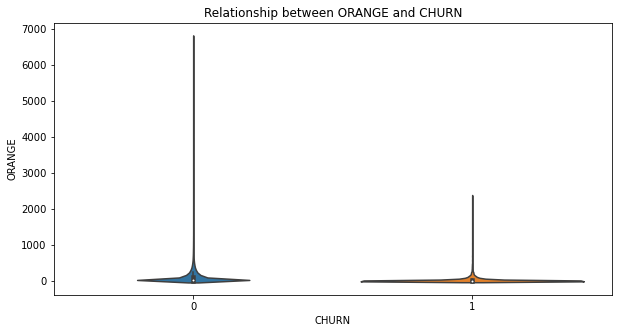

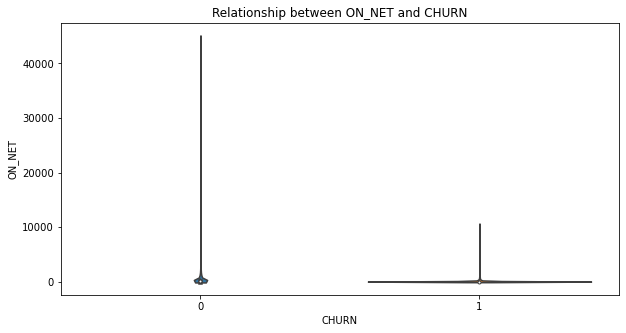

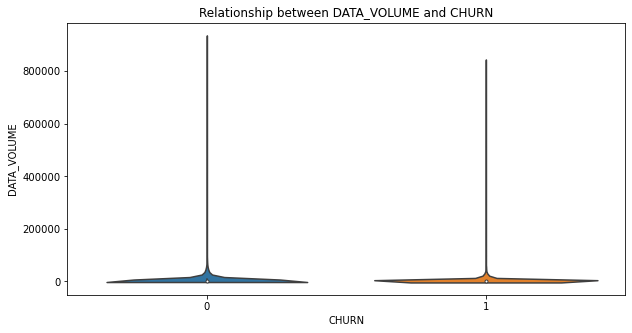

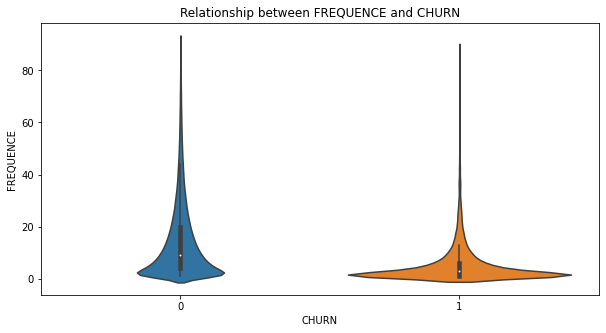

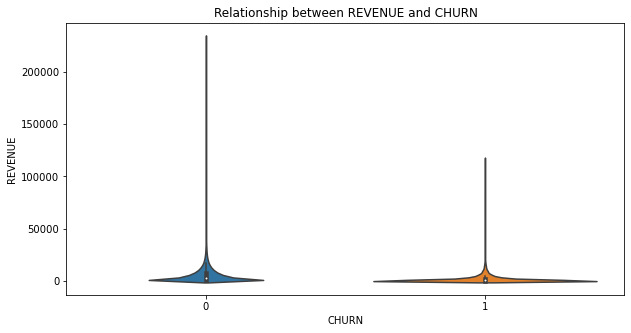

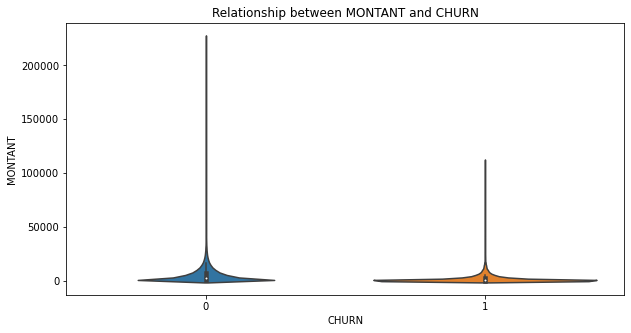

In [ ]:
# Plot the relationship between numerical features and the target variable
for col in numerical_features:
    plt.figure(figsize=(10, 5))
    sns.violinplot(x='CHURN', y=col, data=train)
    plt.title(f'Relationship between {col} and CHURN')
    plt.show()


In [ ]:
# Calculate the correlation of features with the target variable 'CHURN'
correlation_with_target = train.corr()['CHURN'].sort_values(ascending=False)
correlation_with_target


CHURN             1.000000
ZONE1             0.019937
ZONE2             0.000273
TIGO             -0.035890
DATA_VOLUME      -0.036015
ON_NET           -0.057701
ORANGE           -0.063382
FREQ_TOP_PACK    -0.085136
MONTANT          -0.106229
REVENUE          -0.114822
ARPU_SEGMENT     -0.114822
FREQUENCE_RECH   -0.123113
FREQUENCE        -0.139685
REGULARITY       -0.479120
Name: CHURN, dtype: float64

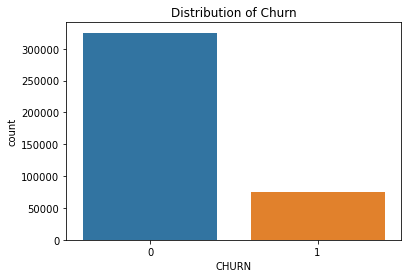

In [ ]:
# Visualizing the target variable 'CHURN'
sns.countplot(x='CHURN', data=train)
plt.title('Distribution of Churn')
plt.show()

In [ ]:
# Descriptive statistics of the training data
train.describe()


,MONTANT,FREQUENCE_RECH,REVENUE,ARPU_SEGMENT,FREQUENCE,DATA_VOLUME,ON_NET,ORANGE,TIGO,ZONE1,ZONE2,REGULARITY,FREQ_TOP_PACK,CHURN
count,259723.000000,259723.000000,265337.000000,265337.000000,265337.000000,203146.000000,254181.000000,233683.000000,160614.000000,31690.000000,25513.000000,400000.000000,232671.000000,400000.00000
mean,5522.971346,11.503733,5505.487757,1835.167658,13.951835,3369.763441,275.917586,95.532927,23.134608,7.874282,7.187003,28.046502,9.254209,0.18711
std,7099.640630,13.275514,7175.802367,2391.929290,14.679943,12281.867504,873.593034,204.733272,63.061871,35.642843,26.964028,22.282773,12.305563,0.39000
min,20.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.00000
25%,1000.000000,2.000000,1000.000000,333.000000,3.000000,0.000000,5.000000,7.000000,2.000000,0.000000,0.000000,6.000000,2.000000,0.00000
50%,3000.000000,6.000000,3000.000000,1000.000000,9.000000,267.000000,27.000000,29.000000,6.000000,1.000000,2.000000,24.000000,5.000000,0.00000
75%,7300.000000,15.000000,7340.000000,2447.000000,19.000000,2925.000000,155.000000,99.000000,20.000000,3.000000,5.000000,51.000000,12.000000,0.00000
max,226550.000000,133.000000,233413.000000,77804.000000,91.000000,934576.000000,45011.000000,6788.000000,2758.000000,1657.000000,1011.000000,62.000000,629.000000,1.00000


## Data Preprocessing
We need to preprocess the data before feeding it into the model. This includes **handling missing values**, **encoding categorical variables**, and **feature scaling.**

In [ ]:
# Dropping target variable from training data
churn = train['CHURN']
train = train.drop('CHURN', axis=1)

In [ ]:
# Combine train and test data for uniform preprocessing
data = pd.concat([train, test], sort=False)
data.head()

,user_id,REGION,TENURE,MONTANT,FREQUENCE_RECH,REVENUE,ARPU_SEGMENT,FREQUENCE,DATA_VOLUME,ON_NET,ORANGE,TIGO,ZONE1,ZONE2,MRG,REGULARITY,TOP_PACK,FREQ_TOP_PACK
0,dcf68cc2fb515ccad7d8b9b3bd80ee2a4b270063,SAINT-LOUIS,K > 24 month,17000.0,32.0,18000.0,6000.0,34.0,NaN,97.0,355.0,6.0,NaN,NaN,NO,62,All-net 500F=2000F;5d,35.0
1,71c44b5ba328db5c4192a80f7cf8f244d9350ed0,NaN,K > 24 month,4300.0,29.0,4427.0,1476.0,37.0,1764.0,8.0,3.0,0.0,NaN,2.0,NO,40,"Data: 100 F=40MB,24H",22.0
2,ce46411b1526c94f20a383b8cb188f8d27f82a0a,TAMBACOUNDA,K > 24 month,1500.0,3.0,1500.0,500.0,3.0,NaN,30.0,30.0,NaN,NaN,NaN,NO,32,All-net 500F=2000F;5d,3.0
3,f467cdb6669818373c26c2bad44e01ba66f97d21,FATICK,K > 24 month,1500.0,3.0,2497.0,832.0,4.0,0.0,159.0,45.0,19.0,NaN,NaN,NO,18,On net 200F=Unlimited _call24H,3.0
4,ec45e1a1888a32b5dcce0954cfec20c6e037db31,FATICK,K > 24 month,NaN,NaN,498.0,166.0,3.0,1.0,1.0,3.0,NaN,NaN,NaN,NO,50,NaN,NaN


In [ ]:
# Check for missing values
missing_values = data.isnull().sum()
missing_values

user_id                0
REGION            196813
TENURE                 0
MONTANT           175228
FREQUENCE_RECH    175228
REVENUE           168153
ARPU_SEGMENT      168153
FREQUENCE         168153
DATA_VOLUME       246192
ON_NET            182202
ORANGE            207517
TIGO              299174
ZONE1             460630
ZONE2             468065
MRG                    0
REGULARITY             0
TOP_PACK          209032
FREQ_TOP_PACK     209032
dtype: int64

#### handling missing values

In [ ]:
# Calculate the percentage of missing values
missing_percentage = (missing_values / len(data)) * 100

# Combine the missing values and their percentages into a DataFrame
missing_data = pd.DataFrame({'Missing Values': missing_values, 'Percentage': missing_percentage})

# Display the DataFrame sorted by percentage of missing values in descending order
missing_data = missing_data[missing_data['Missing Values'] > 0].sort_values(by='Percentage', ascending=False)
missing_data

,Missing Values,Percentage
ZONE2,468065,93.6130
ZONE1,460630,92.1260
TIGO,299174,59.8348
DATA_VOLUME,246192,49.2384
TOP_PACK,209032,41.8064
FREQ_TOP_PACK,209032,41.8064
ORANGE,207517,41.5034
REGION,196813,39.3626
ON_NET,182202,36.4404
MONTANT,175228,35.0456


In [ ]:
# Drop columns with too many missing values or not useful for the model
data = data.drop(['ZONE1', 'ZONE2'], axis=1)



### Why We Fill Missing Values
Handling missing values is a critical step in data preprocessing. Missing values can cause issues with machine learning algorithms, which often require complete datasets to function correctly. By filling in missing values, we ensure that our model can be trained without errors and that it makes the best use of the available data.

### Why We Used the Median for Numerical Columns
For numerical columns, we chose to fill missing values with the median. The median is a robust measure of central tendency that is less affected by outliers compared to the mean. This makes it a good choice for imputation, especially in datasets where the distribution of the data may be skewed or contain outliers. By using the median, we minimize the risk of distorting the distribution of the data.

### Other Strategies for Handling Missing Values
There are several other strategies you can explore for handling missing values, including:

1. **Mean Imputation**: Replace missing values with the mean of the column. This is straightforward but can be influenced by outliers.
   
2. **Mode Imputation**: For categorical variables, replace missing values with the most frequent category (mode). This preserves the most common value in the dataset.

3. **Forward/Backward Fill**: For time-series data, you can use the previous (forward fill) or next (backward fill) value to fill missing data points. This maintains the temporal order of the data.

4. **Interpolation**: For numerical data, interpolate missing values using linear or polynomial methods. This can be useful for time-series data where you want to maintain the trend.

5. **Predictive Modeling**: Use a machine learning model to predict and fill missing values based on other available features. This can be more accurate but requires building and validating a separate model for imputation.

6. **Deletion**: In some cases, you might choose to remove rows or columns with missing values. This is only advisable if the amount of missing data is small and won't significantly impact the analysis or model performance.

Choosing the right strategy depends on the specific characteristics of your dataset and the nature of the missing data. It's often useful to try different approaches and evaluate their impact on model performance.


In [ ]:
# Fill missing values in categorical columns with "Missing_{column_name}"
for col in data.select_dtypes(include=['object']).columns:
    data[col].fillna(f'Missing_{col}', inplace=True)

# Fill missing values in numerical columns with the median
for col in data.select_dtypes(include=[np.number]).columns:
    data[col].fillna(data[col].median(), inplace=True)

# Verify that there are no missing values left
data.isnull().sum()


user_id           0
REGION            0
TENURE            0
MONTANT           0
FREQUENCE_RECH    0
REVENUE           0
ARPU_SEGMENT      0
FREQUENCE         0
DATA_VOLUME       0
ON_NET            0
ORANGE            0
TIGO              0
MRG               0
REGULARITY        0
TOP_PACK          0
FREQ_TOP_PACK     0
dtype: int64

In [ ]:
# View Overcorrelated columns
data[['REVENUE','ARPU_SEGMENT']]

,REVENUE,ARPU_SEGMENT
0,18000.0,6000.0
1,4427.0,1476.0
2,1500.0,500.0
3,2497.0,832.0
4,498.0,166.0
...,...,...
99995,20.0,7.0
99996,998.0,333.0
99997,1799.0,600.0
99998,2515.0,838.0


In [ ]:
# Drop Overcorrelated columns
data = data.drop(['REVENUE'], axis=1)

#### handling categorical columns

In [ ]:
# Display the number of unique categories in all object columns
categorical_columns = data.select_dtypes(include=['object']).columns

# Create a DataFrame to display the results
unique_categories = pd.DataFrame({
    'Column': categorical_columns,
    'Unique Categories': [data[col].nunique() for col in categorical_columns]
})

unique_categories = unique_categories.sort_values(by='Unique Categories', ascending=False)
unique_categories


,Column,Unique Categories
0,user_id,500000
4,TOP_PACK,113
1,REGION,15
2,TENURE,8
3,MRG,1


In [ ]:
data['MRG'].value_counts()

NO    500000
Name: MRG, dtype: int64

In [ ]:
data = data.drop(['MRG'], axis=1)

In [ ]:
# Encode categorical variables
data = pd.get_dummies(data, columns=['REGION', 'TOP_PACK', 'TENURE'], drop_first=True)


In [ ]:
# Drop the 'user_id' as it is not useful for the model
data = data.drop('user_id', axis=1)

In [ ]:
# Split the combined data back into train and test sets
train = data.iloc[:len(churn), :]
test = data.iloc[len(churn):, :]

## Model Building
We will use the CatBoostClassifier for this binary classification task.


In [ ]:
from catboost import CatBoostClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, log_loss, confusion_matrix


In [ ]:
# Splitting the training data into train and validation sets
X_train, X_val, Y_train, Y_val = train_test_split(train, churn, test_size=0.2, random_state=42)


In [ ]:
# Initializing and training the CatBoostClassifier
classifier = CatBoostClassifier(loss_function='Logloss', learning_rate=0.01, use_best_model=True, eval_metric='Logloss')
classifier.fit(X_train, Y_train, eval_set=(X_val, Y_val), early_stopping_rounds=100, verbose=100)


0:	learn: 0.6759304	test: 0.6759611	best: 0.6759611 (0)	total: 233ms	remaining: 3m 52s

100:	learn: 0.2728835	test: 0.2746854	best: 0.2746854 (100)	total: 9.14s	remaining: 1m 21s

200:	learn: 0.2560406	test: 0.2589663	best: 0.2589663 (200)	total: 18s	remaining: 1m 11s

300:	learn: 0.2535422	test: 0.2569455	best: 0.2569455 (300)	total: 27s	remaining: 1m 2s

400:	learn: 0.2526788	test: 0.2563651	best: 0.2563651 (400)	total: 35.9s	remaining: 53.6s

500:	learn: 0.2521891	test: 0.2560641	best: 0.2560641 (500)	total: 44.4s	remaining: 44.2s

600:	learn: 0.2518326	test: 0.2558783	best: 0.2558782 (599)	total: 54.3s	remaining: 36s

700:	learn: 0.2515667	test: 0.2557492	best: 0.2557492 (700)	total: 1m 3s	remaining: 26.9s

800:	learn: 0.2513294	test: 0.2556518	best: 0.2556518 (800)	total: 1m 11s	remaining: 17.8s

900:	learn: 0.2511040	test: 0.2555727	best: 0.2555726 (899)	total: 1m 20s	remaining: 8.82s

999:	learn: 0.2509097	test: 0.2555051	best: 0.2555047 (998)	total: 1m 28s	remaining: 0us



bes

## Model Evaluation
Evaluating the model on the validation set

In [ ]:
Y_pred = classifier.predict(X_val)
print("Accuracy:", accuracy_score(Y_val, Y_pred))
print("Classification Report:\n", classification_report(Y_val, Y_pred))


Accuracy: 0.87745

Classification Report:

               precision    recall  f1-score   support



           0       0.92      0.93      0.93     65023

           1       0.68      0.65      0.66     14977



    accuracy                           0.88     80000

   macro avg       0.80      0.79      0.79     80000

weighted avg       0.88      0.88      0.88     80000




In [ ]:
# Predicting probabilities for log loss calculation
Y_pred_proba = classifier.predict_proba(X_val)[:, 1]
print("Log Loss:", log_loss(Y_val, Y_pred_proba))

Log Loss: 0.2555046815321741


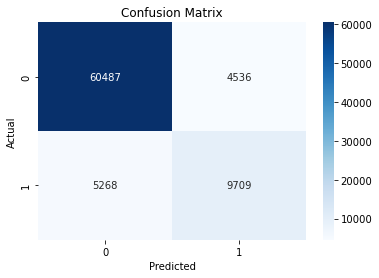

In [ ]:
# Confusion matrix
cm = confusion_matrix(Y_val, Y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

## Feature Importance
Plotting feature importances to understand which features the model found most useful

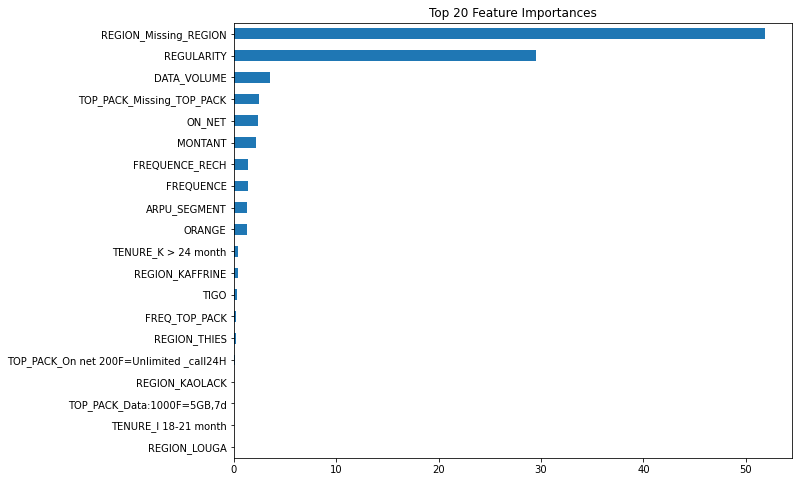

In [ ]:
# Get the feature importances from the classifier
feature_importances = pd.Series(classifier.feature_importances_, index=X_train.columns)

# Sort the feature importances and select the top 20
top_20_features = feature_importances.sort_values(ascending=False).head(20)

# Plot the top 20 feature importances
top_20_features.sort_values().plot(kind='barh', figsize=(10, 8))
plt.title('Top 20 Feature Importances')
plt.show()


In [ ]:
## Making Predictions on Test Data
# Finally, we use the trained model to make predictions on the test set and prepare the submission file.
predictions = classifier.predict_proba(test)[:, 1]
baseline_sub = sample_sub.copy()
baseline_sub['CHURN'] = predictions
baseline_sub.to_csv('baseline_submission_catboost_expresso.csv', index=False)

# Display the first few rows of the submission file
baseline_sub.head()

,user_id,CHURN
0,af900d87e73b7ff6509d2203df4704a98aa5f2a6,0.783893
1,5335efd940280b82143272275637d1e65d37eadb,0.648106
2,a581f4fa08677c26f83f643248c667e241043086,0.120891
3,64f67177d0775262b8087a9e2e3b8061b6324ae6,0.001191
4,0d6009a4594c4be22449b8d9cc01a0bcea98faea,0.000299


## Submission Results

I have submitted my model to the Zindi competition and achieved a score of **0.251615916** on the public leaderboard.

## Methods to Improve the Score

While the current model performs reasonably well, there are several strategies we can explore to further improve the score:

### 0. Data Cleaning
- ```TENURE```, ```REGION``` and ```TOP_PACK``` can be handled better, try extracting keywords or additional data from it and using regex, etc.

### 1. Feature Engineering
- **Create New Features**: Derive new features from existing ones, such as interaction terms, ratios, or domain-specific features.
- **Feature Selection**: Use techniques like Recursive Feature Elimination (RFE) or feature importance from models to select the most relevant features.

### 2. Advanced Missing Value Imputation

- **Let the Model Handle it**: Some models have the ability to handle missing values, catboost, xgboost, etc.
- **K-Nearest Neighbors (KNN) Imputation**: Use KNN to fill missing values based on the similarity of data points.
- **Multivariate Imputation by Chained Equations (MICE)**: Use multiple imputations to handle missing data more robustly.

### 3. Hyperparameter Tuning
- **Grid Search or Random Search or Optuna**: Perform hyperparameter tuning using grid search or random search to find the optimal parameters for the model. Optuna is another powerful library for hyperparameter tuning.


### 4. Model Ensemble
- **Ensemble Methods**: Combine predictions from multiple models (e.g., bagging, boosting, stacking) to improve overall performance.
- **Blending**: Create a blend of different models' predictions to leverage their strengths.

### 5. Cross-Validation
- **K-Fold Cross-Validation**: Use k-fold cross-validation to ensure that the model's performance is consistent across different subsets of the data.
- **Stratified K-Fold**: Use stratified k-fold cross-validation to maintain the proportion of the target variable in each fold.

### 6. Experiment with Different Algorithms
- **Try Other Algorithms**: Experiment with different machine learning algorithms such as XGBoost, LightGBM to see if they perform better.


### 7. Handling Imbalanced Data
- **Resampling Techniques**: Use over-sampling or under-sampling techniques to handle imbalanced data.
- **Class Weight Adjustment**: Adjust class weights in the model to handle imbalanced classes.

By systematically exploring these methods, you can potentially improve the model's performance and achieve a better score on the leaderboard.

Happy Hacking!!!


I am always open to assist enthusiasts with difficulties they are facing in Machine learning and Deep learning. Feel free to reach out to me: most preferably LinkedIn.

. [Twitter](https://twitter.com/olufemivictort).

. [Linkedin](https://www.linkedin.com/in/olufemi-victor-tolulope).

. [Github](https://github.com/osinkolu)

### Author: Olufemi Victor Tolulope